<a href="https://colab.research.google.com/github/hasibulhimu49/DataMiningLab__CSE_476/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret[full]
!pip install pycaret[mlops]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path='/content/drive/MyDrive/DataSET/heart_disease_uci.csv'

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(dataset_path)
df.head(10)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [ ]:
df.drop(columns=['id', 'dataset'], inplace=True)
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df.drop(columns=['num'], inplace=True)


In [ ]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,56,Male,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,62,Female,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,1
7,57,Female,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,63,Male,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,1
9,53,Male,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [ ]:
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})


df['fbs'] = df['fbs'].map({'Yes': 1, 'No': 0})
df['exang'] = df['exang'].map({'Yes': 1, 'No': 0})

df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

print(df.dtypes)


age                           int64
sex                           int64
trestbps                    float64
chol                        float64
fbs                         float64
thalch                      float64
exang                       float64
oldpeak                     float64
ca                          float64
target                        int64
cp_atypical angina             bool
cp_non-anginal                 bool
cp_typical angina              bool
restecg_normal                 bool
restecg_st-t abnormality       bool
slope_flat                     bool
slope_upsloping                bool
thal_normal                    bool
thal_reversable defect         bool
dtype: object


In [ ]:
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)

print(df.dtypes)


age                           int64
sex                           int64
trestbps                    float64
chol                        float64
fbs                         float64
thalch                      float64
exang                       float64
oldpeak                     float64
ca                          float64
target                        int64
cp_atypical angina            int64
cp_non-anginal                int64
cp_typical angina             int64
restecg_normal                int64
restecg_st-t abnormality      int64
slope_flat                    int64
slope_upsloping               int64
thal_normal                   int64
thal_reversable defect        int64
dtype: object


In [ ]:
!pip install --upgrade pycaret
!pip install --upgrade mlflow


In [ ]:
from pycaret.classification import *

env = setup(
    data=df,
    target='target',
    session_id=42,
    normalize=True,
    remove_multicollinearity=True,
    log_experiment=False,
    experiment_name='heart_disease'
)


,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(920, 19)"
4,Transformed data shape,"(920, 17)"
5,Transformed train set shape,"(644, 17)"
6,Transformed test set shape,"(276, 17)"
7,Numeric features,18
8,Rows with missing values,100.0%
9,Preprocess,True


In [ ]:
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8306,0.8895,0.8649,0.8353,0.8489,0.6562,0.6590,3.0070
nb,Naive Bayes,0.8245,0.8824,0.8570,0.8314,0.8433,0.6440,0.6459,0.0770
gbc,Gradient Boosting Classifier,0.8213,0.8777,0.8561,0.8280,0.8402,0.6372,0.6407,0.1970
lr,Logistic Regression,0.8198,0.8904,0.8510,0.8273,0.8378,0.6349,0.6375,1.7480
ridge,Ridge Classifier,0.8183,0.8883,0.8567,0.8222,0.8380,0.6310,0.6342,0.0760
lda,Linear Discriminant Analysis,0.8183,0.8882,0.8567,0.8222,0.8380,0.6310,0.6342,0.0470
rf,Random Forest Classifier,0.8120,0.8811,0.8452,0.8217,0.8319,0.6184,0.6219,0.2660
lightgbm,Light Gradient Boosting Machine,0.8042,0.8682,0.8338,0.8178,0.8236,0.6033,0.6079,1.1130
et,Extra Trees Classifier,0.8012,0.8711,0.8285,0.8167,0.8211,0.5971,0.6000,0.3270
xgboost,Extreme Gradient Boosting,0.7980,0.8603,0.8198,0.8198,0.8176,0.5908,0.5948,0.1810


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:

model = create_model(best_model)

tuned_model = tune_model(model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.9004,0.8056,0.8286,0.8169,0.5967,0.5969
1,0.8769,0.9186,0.9444,0.8500,0.8947,0.7476,0.7536
2,0.8615,0.9502,0.9167,0.8462,0.8800,0.7170,0.7202
3,0.8615,0.9052,0.8611,0.8857,0.8732,0.7208,0.7211
4,0.7656,0.7941,0.7714,0.7941,0.7826,0.5285,0.5287
5,0.8125,0.8404,0.9143,0.7805,0.8421,0.6148,0.6266
6,0.8125,0.9330,0.8286,0.8286,0.8286,0.6217,0.6217
7,0.8125,0.8512,0.8571,0.8108,0.8333,0.6194,0.6207
8,0.8594,0.8770,0.9167,0.8462,0.8800,0.7108,0.7142


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7692,0.8602,0.7778,0.8000,0.7887,0.5346,0.5349
1,0.8615,0.8870,0.9444,0.8293,0.8831,0.7151,0.7242
2,0.8769,0.9435,0.8889,0.8889,0.8889,0.7510,0.7510
3,0.8923,0.9023,0.9167,0.8919,0.9041,0.7814,0.7817
4,0.7500,0.7862,0.7143,0.8065,0.7576,0.5015,0.5054
5,0.7812,0.8522,0.8857,0.7561,0.8158,0.5507,0.5612
6,0.8125,0.9123,0.8000,0.8485,0.8235,0.6239,0.6251
7,0.8125,0.8611,0.8857,0.7949,0.8378,0.6171,0.6222
8,0.8594,0.8929,0.9167,0.8462,0.8800,0.7108,0.7142


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


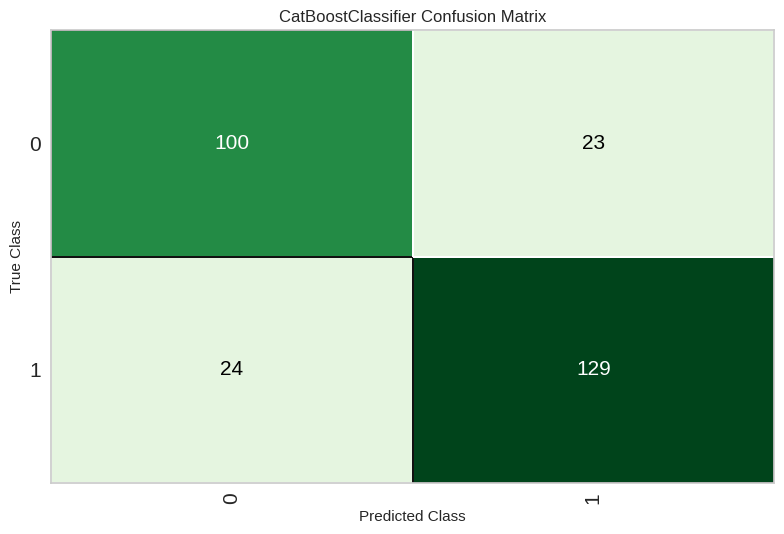

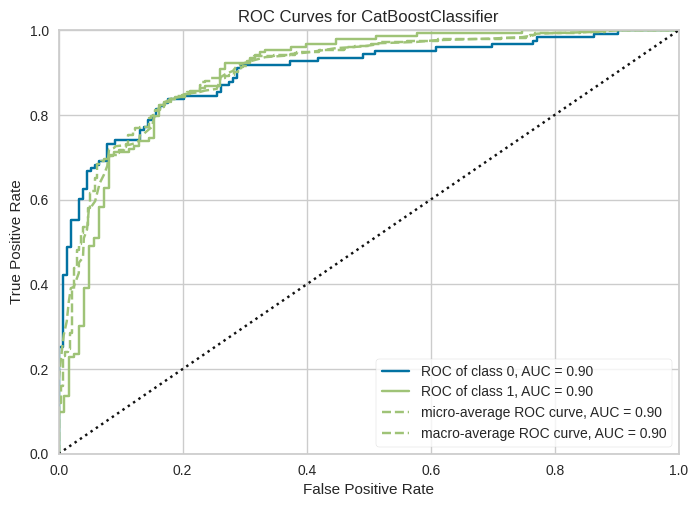

In [ ]:
plot_model(tuned_model, plot='confusion_matrix')

plot_model(tuned_model, plot='auc')

#TN,FP
#FN,TP